# RE operations

You may watch a portion of the following Youtube video (fast-forwarding as needed) to obtain
an overview of RE-related operations.

We will discuss:

* REs for some simple languages

* RE to NFA conversion

* NFA to RE conversion


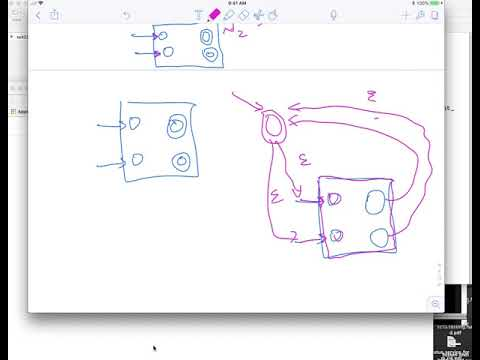

In [1]:
# This Youtube video walks through many RE operations
from IPython.display import YouTubeVideo
YouTubeVideo('eXjIYsalFEQ')


In [2]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path

from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accepts_nfa)
help(nfa2dfa)
help(n2d)
help(inSets)
help(rev_dfa)
help(min_dfa_brz)

You may use any of these help commands:
help(re2nfa)

You may use any of these help commands:
help(RE2Str)
help(mk_gnfa)
help(mk_gnfa_from_D)
help(dfa2nfa)
help(del_gn

 # We will develop REs for some example languages

Generating LALR tables


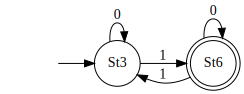

In [3]:
# RE for the language of odd 1's (over the alphabet {0,1})

RE_Odd1s  = "(0* 1 0* (1 0* 1 0*)*)"
NFA_Odd1s = re2nfa(RE_Odd1s)
DO_Odd1s  = dotObj_dfa(min_dfa(nfa2dfa(NFA_Odd1s)))
DO_Odd1s

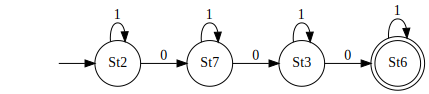

In [4]:
# RE for the language of exactly three 0's 

RE_Ex3z = "1* 0 1* 0 1* 0 1*"
NFA_Ex3z = re2nfa(RE_Ex3z)
DO_Ex3z  = dotObj_dfa(min_dfa(nfa2dfa(NFA_Ex3z)))
DO_Ex3z

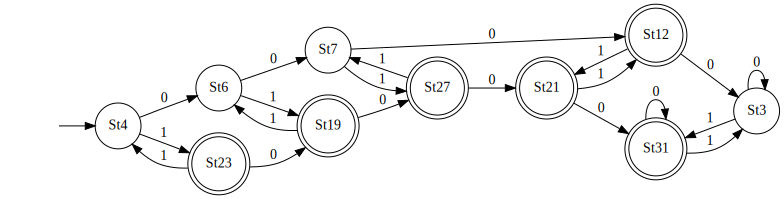

In [5]:
# RE for odd 1's or exactly three 0's

RE_O13z  = "0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "
NFA_O13z = re2nfa(RE_O13z)
MD_O13z  = min_dfa(nfa2dfa(NFA_O13z))
DO_O13z  = dotObj_dfa(MD_O13z)
DO_O13z

# Examples of RE to NFA conversion

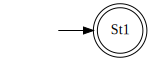

In [6]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("''"))))

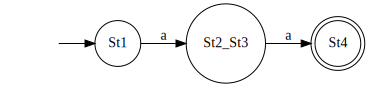

In [7]:
# DFA for the language of "aa" generated via re2nfa, nfa2dfa and min_dfa

D1 = min_dfa(nfa2dfa(re2nfa("aa")))
dotObj_dfa(D1)

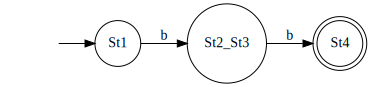

In [8]:
# DFA for the language of "bb" generated via re2nfa, nfa2dfa and min_dfa

D2 = min_dfa(nfa2dfa(re2nfa("bb")))
dotObj_dfa(D2)

In [9]:
D1

{'Q': {'BH', "{'St1'}", "{'St2', 'St3'}", "{'St4'}"},
 'Sigma': {'a'},
 'Delta': {("{'St1'}", 'a'): "{'St2', 'St3'}",
  ("{'St2', 'St3'}", 'a'): "{'St4'}",
  ("{'St4'}", 'a'): 'BH',
  ('BH', 'a'): 'BH'},
 'q0': "{'St1'}",
 'F': {"{'St4'}"}}

In [10]:
D2

{'Q': {'BH', "{'St1'}", "{'St2', 'St3'}", "{'St4'}"},
 'Sigma': {'b'},
 'Delta': {("{'St1'}", 'b'): "{'St2', 'St3'}",
  ("{'St2', 'St3'}", 'b'): "{'St4'}",
  ("{'St4'}", 'b'): 'BH',
  ('BH', 'b'): 'BH'},
 'q0': "{'St1'}",
 'F': {"{'St4'}"}}

Union on DFA with different alphabets.
Making alphabets the same (taking unions).


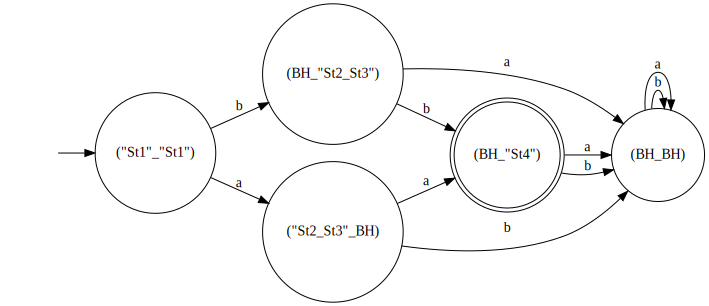

In [11]:
# The union of the DFA of the aforesaid languages, i.e. {aa,bb}

D1or2 = min_dfa(union_dfa(D1,D2))
D1or2p = pruneUnreach(D1or2)
dotObj_dfa(D1or2)

Intersection on DFA with different alphabets.
Making alphabets the same (taking unions).


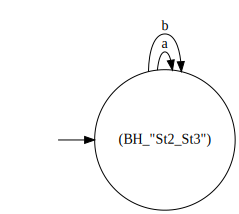

In [12]:
# The intersection of {aa} and {bb}

D1and2 = min_dfa(intersect_dfa(D1,D2))
D1and2p = pruneUnreach(D1and2)
dotObj_dfa(D1and2)

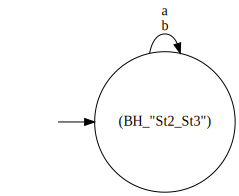

In [13]:
dotObj_dfa_w_bh(D1and2p, FuseEdges=True)

In [14]:
# Another example of the power of the conversions and checking facilities for DFA equivalence


d1=nfa2dfa(re2nfa("abcde"))
d2=nfa2dfa(re2nfa("abced"))
langeq_dfa(d1,d2,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[("{'St1'}", "{'St1'}"), ("{'St2', 'St3'}", "{'St2', 'St3'}"), ("{'St4', 'St5'}", "{'St4', 'St5'}"), ("{'St6', 'St7'}", "{'St6', 'St7'}"), ('BH', "{'St8', 'St9'}"), ('BH', "{'St10'}")]


False

## Counterexamples

When two DFA are not equivalent, one can obtain a counterexample heping us debug. The counterexample
is a sequence of pairs of DFA states.

```
Here the path is

("{'St1'}", "{'St1'}"),                  -- this pair of states exists in the DFAs below
("{'St2', 'St3'}", "{'St2', 'St3'}"),    -- this pair also exists
("{'St4', 'St5'}", "{'St4', 'St5'}"),    -- so does this
("{'St6', 'St7'}", "{'St6', 'St7'}"),    -- so does this  
('BH', "{'St8', 'St9'}"),                -- oops, one machine goes into the BH, the other not
('BH', "{'St10'}")                       -- this too; one machine goes to St10, the other is BH

```

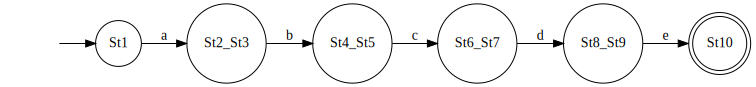

In [15]:
dotObj_dfa(d1)

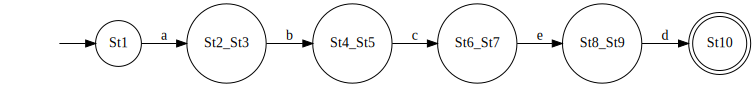

In [16]:
dotObj_dfa(d2)

In [17]:
# Two other RE-based languages that are not equivalent
# We can read the counterexample the same way

d1a=nfa2dfa(re2nfa("aa*+bc"))
d2a=nfa2dfa(re2nfa("a(a*+bc)"))
langeq_dfa(d1a,d2a,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[('St1', 'St1'), ('St2', 'St2'), ('BH', 'St4'), ('BH', 'St5')]


False

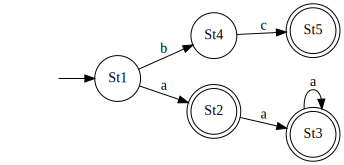

In [18]:
dotObj_dfa(d1a)

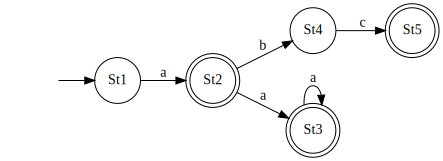

In [19]:
dotObj_dfa(d2a)

In [20]:
d1b=nfa2dfa(re2nfa("aaa*+aa*bc+bcaa*+bcbc"))
d2b=nfa2dfa(re2nfa("(aa*+bc)(aa*+bc)"))
langeq_dfa(d1b,d2b,True)

True

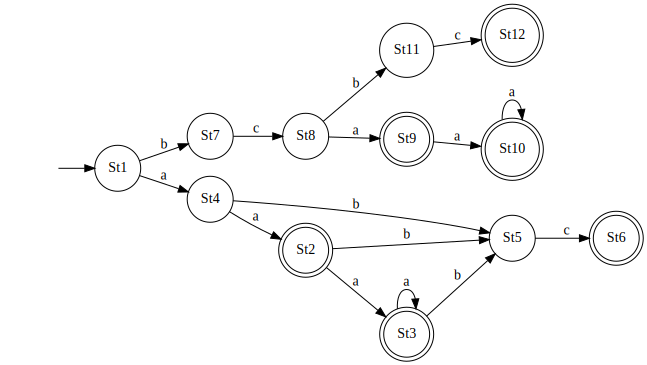

In [21]:
dotObj_dfa(d1b)

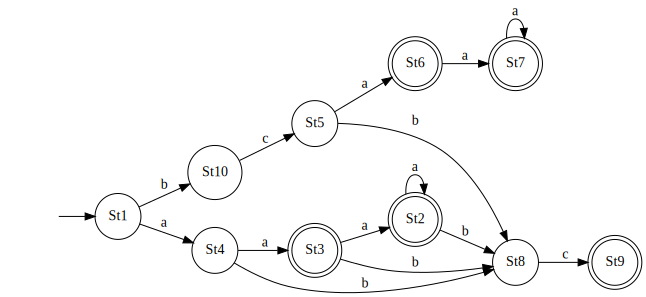

In [22]:
dotObj_dfa(d2b)

In [23]:
iso_dfa(d1b,d2b)

False

In [24]:
d1c=min_dfa(d1b)

In [25]:
d2c=min_dfa(d2b)

In [26]:
iso_dfa(d1c,d2c)

True

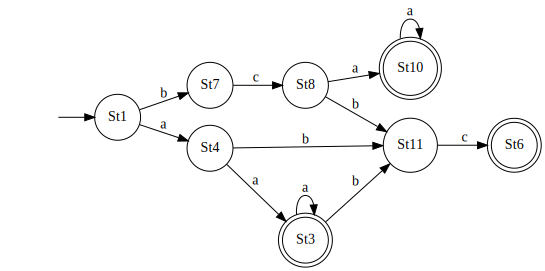

In [27]:
dotObj_dfa(d1c)

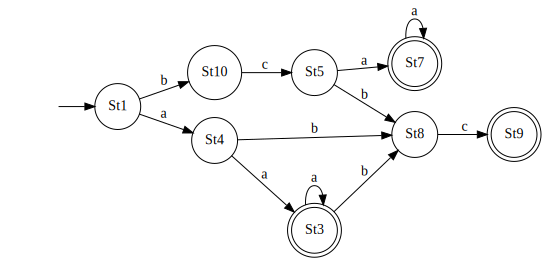

In [28]:
dotObj_dfa(d2c)

In [29]:
d1d=nfa2dfa(re2nfa("aaa*+aa*bc+bcaaa*+bcbc"))
d2d=nfa2dfa(re2nfa("(aa*+bc)(aa*+bc)"))
langeq_dfa(d1d,d2d,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[('St1', 'St1'), ('St7', 'St10'), ('St8', 'St5'), ('St9', 'St6')]


False

In [30]:
d1d=nfa2dfa(re2nfa("a a a*+a a* b c+ b c a a a*+b c b c"))
d2d=nfa2dfa(re2nfa("(a a*+b c)(a a*+b c)"))
langeq_dfa(d1d,d2d,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[('St1', 'St1'), ('St7', 'St10'), ('St8', 'St5'), ('St9', 'St6')]


False

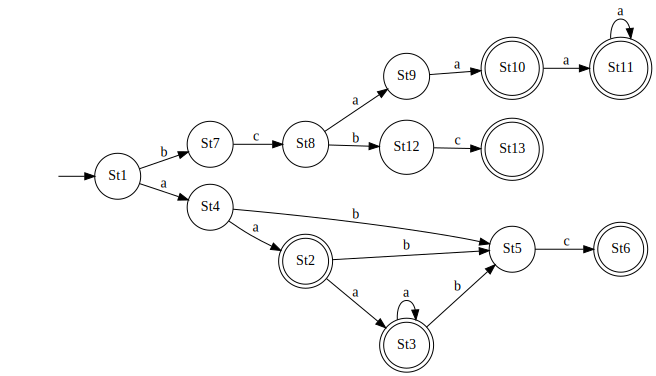

In [31]:
dotObj_dfa(d1d)

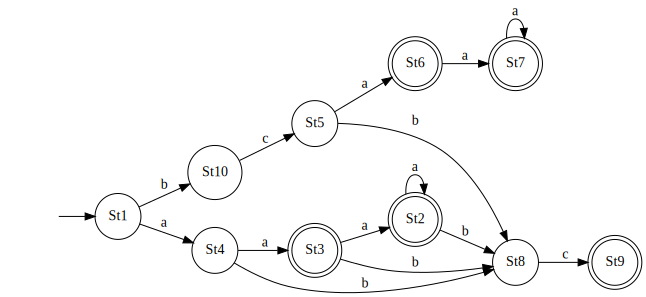

In [32]:
dotObj_dfa(d2d)

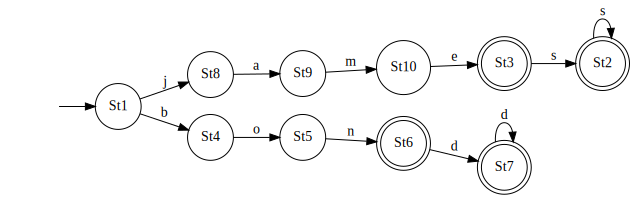

In [33]:
d1d=nfa2dfa(re2nfa("james*+bond*"))
dotObj_dfa(d1d)

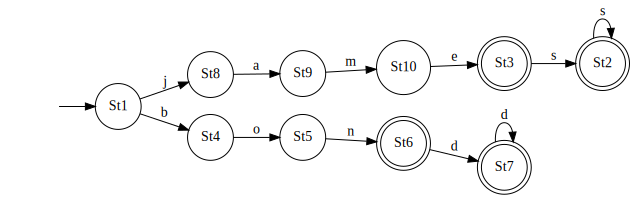

In [34]:
d1d=nfa2dfa(re2nfa("ja mes*+bo nd*"))
dotObj_dfa(d1d)

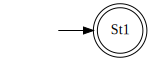

In [35]:
d1d=nfa2dfa(re2nfa("''"))
dotObj_dfa(d1d)

Generating LALR tables


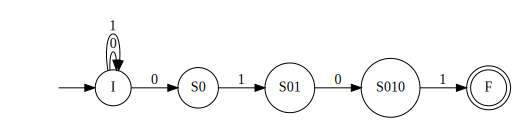

In [36]:
test = md2mc(src="File", fname="endsin0101.nfa")
dotObj_nfa(test)

Generating LALR tables


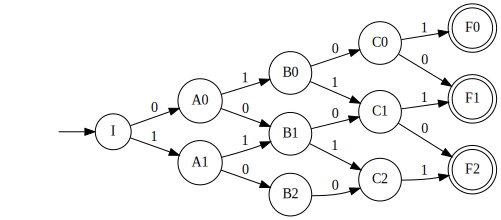

In [37]:
# NFA for 0101 within hamming dist of 2
nfamd1 = md2mc(src="File", fname="nfa0101h2.nfa")
dotObj_nfa(nfamd1)

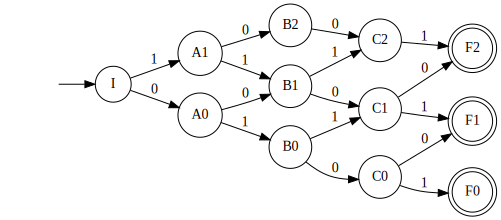

In [38]:
dfamd1=nfa2dfa(nfamd1)
dotObj_dfa(dfamd1)

In [39]:
m1=min_dfa(dfamd1)

In [40]:
m2=min_dfa_brz(dfamd1)

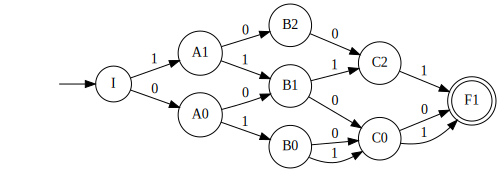

In [41]:
dotObj_dfa(m1)

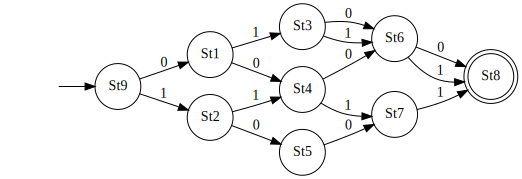

In [42]:
dotObj_dfa(m2)

In [43]:
iso_dfa(m1,m2)

True

# Designing DFA that accept within a Hamming Distance

Given a regular language, say (0+1)* 0101 (0+1)* (i.e., all bit-strings with an occurrence of 0101 in it), let us come up with 

1. An RE that represents strings within a Hamming distance of 2 from strings in this language

2. An NFA that represents strings within a Hamming distance of 2 from strings in this language


In [72]:
h2_0101_re = ("(0+1)* ( (0+1)(0+1)01 +" + 
                      " (0+1)1(0+1)1 +" + 
                      " (0+1)10(0+1) +" + 
                      " 0(0+1)(0+1)1 +" +
                      " 0(0+1)0(0+1) +" +
                      " 01(0+1)(0+1) )" +
              "(0+1)*")

In [73]:
h2_0101_re

'(0+1)* ( (0+1)(0+1)01 + (0+1)1(0+1)1 + (0+1)10(0+1) + 0(0+1)(0+1)1 + 0(0+1)0(0+1) + 01(0+1)(0+1) )(0+1)*'

In [74]:
minD_h2_0101_re = min_dfa(nfa2dfa(re2nfa(h2_0101_re)))

In [75]:
DO_minD_h2_0101_re = dotObj_dfa(minD_h2_0101_re)

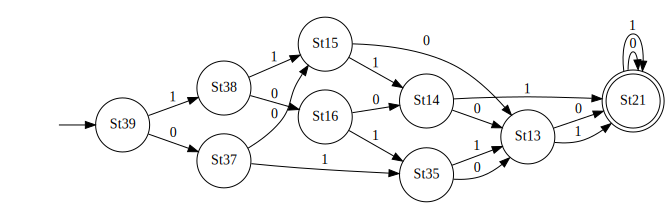

In [76]:
DO_minD_h2_0101_re

In [77]:
DO_minD_h2_0101_re.source

'// do_St83\ndigraph {\n\tgraph [rankdir=LR]\n\tEMPTY [label="" shape=plaintext]\n\tSt39 [label=St39 peripheries=1 shape=circle]\n\tSt16 [label=St16 peripheries=1 shape=circle]\n\tSt37 [label=St37 peripheries=1 shape=circle]\n\tSt13 [label=St13 peripheries=1 shape=circle]\n\tSt38 [label=St38 peripheries=1 shape=circle]\n\tSt35 [label=St35 peripheries=1 shape=circle]\n\tSt15 [label=St15 peripheries=1 shape=circle]\n\tSt14 [label=St14 peripheries=1 shape=circle]\n\tSt21 [label=St21 peripheries=2 shape=circle]\n\tEMPTY -> St39\n\tSt39 -> St37 [label="0 "]\n\tSt39 -> St38 [label="1 "]\n\tSt37 -> St15 [label="0 "]\n\tSt37 -> St35 [label="1 "]\n\tSt38 -> St16 [label="0 "]\n\tSt38 -> St15 [label="1 "]\n\tSt15 -> St13 [label="0 "]\n\tSt15 -> St14 [label="1 "]\n\tSt35 -> St13 [label="0 "]\n\tSt35 -> St13 [label="1 "]\n\tSt16 -> St14 [label="0 "]\n\tSt16 -> St35 [label="1 "]\n\tSt13 -> St21 [label="0 "]\n\tSt13 -> St21 [label="1 "]\n\tSt14 -> St13 [label="0 "]\n\tSt14 -> St21 [label="1 "]\n\tSt2

In [78]:
h2_0101_nfa_md = '''
NFA
!!--------------------------------------------
!! We are supposed to process (0+1)*0101(0+1)*
!! with up to two "dings" allowed
!!
!! Approach: Silently error-correct, but remember
!! each "ding" in a new state name.
!! After two dings, do not error-correct anymore
!!--------------------------------------------

!!-- pattern for (0+1)* is the usual
!!-- no error-correction needed here :-)
I : 0 | 1 -> I

!!-- Now comes the opportunity to exit I via 0101
!!-- The state names are A,B,C,D with ding-count
!!-- Thus A0 is A with 0 dings
!!-- C2 is C with 2 dings; etc

!!-- Ding-less traversal -- how lucky!
I  : 0 -> A0
A0 : 1 -> B0
B0 : 0 -> C0
C0 : 1 -> F
!!-- Phew, finally at F
F  : 0 | 1 -> F

!!-- First ding in any of these cases
I  : 1 -> A1
A0 : 0 -> B1
B0 : 1 -> C1
C0 : 0 -> F  !!-- ding-recording un-nec.; just goto F

!!-- Second ding in any of these cases
A1 : 0 -> B2
B1 : 1 -> C2
C1 : 0 -> F  !!-- ding-recording un-nec.; just goto F

!!-- No more dings allowed!
B2 : 0 -> C2
C2 : 1 -> F

!!-- Allow one-dingers to finish fine
A1 : 1 -> B1
B1 : 0 -> C1
C1 : 1 -> F

'''

In [79]:
h2_0101_nfa = md2mc(h2_0101_nfa_md)

Generating LALR tables


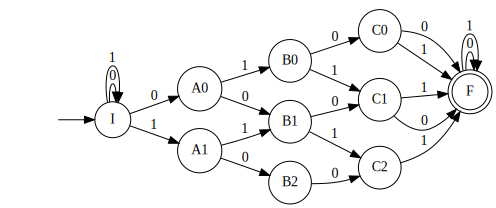

In [80]:
DO_h2_0101_nfa = dotObj_nfa(h2_0101_nfa)
DO_h2_0101_nfa

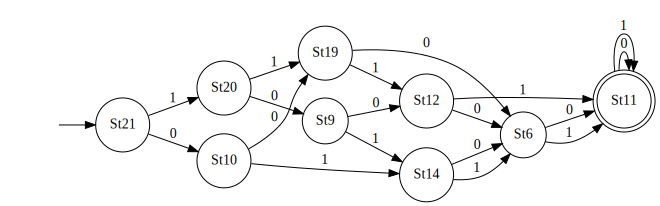

In [81]:
minD_h2_0101_nfa = min_dfa(nfa2dfa(h2_0101_nfa))
DO_minD_h2_0101_nfa = dotObj_dfa(minD_h2_0101_nfa)
DO_minD_h2_0101_nfa

In [82]:
iso_dfa(minD_h2_0101_re, minD_h2_0101_nfa)

True

# We will now illustrate NFA to RE conversion

The workhorse function is del_gnfa_states


In [44]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



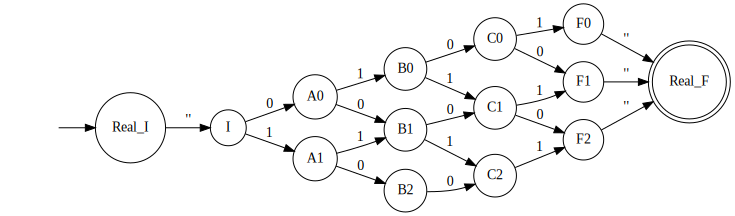

In [45]:
gnfamd1=mk_gnfa(nfamd1)
dotObj_gnfa(gnfamd1)

In [46]:
(Gfinal, dotObj_List, final_re_str) = del_gnfa_states(gnfamd1)

**** Eliminating state A0 ****
**** Eliminating state B1 ****
**** Eliminating state I ****
**** Eliminating state B2 ****
**** Eliminating state C2 ****
**** Eliminating state B0 ****
**** Eliminating state A1 ****
**** Eliminating state F2 ****
**** Eliminating state C1 ****
**** Eliminating state C0 ****
**** Eliminating state F0 ****
**** Eliminating state F1 ****


In [47]:
final_re_str

'(((((((0 1) 0) 0) + ((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 1)) + ((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 1)) + (((((0 1) 0) 1) + ((((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 0) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1))) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1)))) + ((((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 0) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1))) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1))))) + (((((0 1) 0) 1) + ((((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 0) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1))) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1

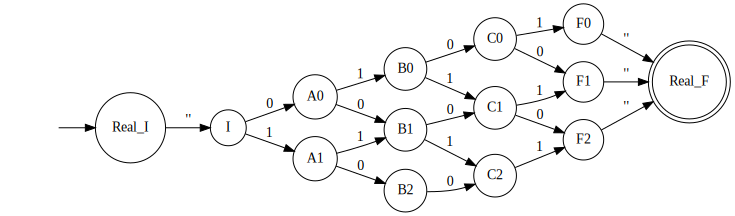

In [48]:
dotObj_List[0]

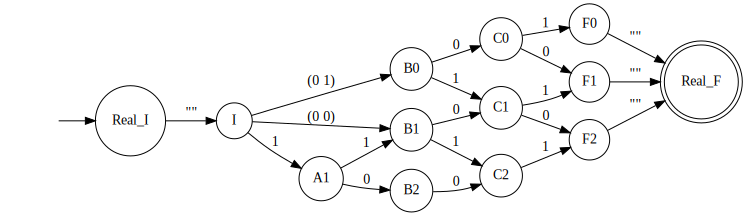

In [49]:
dotObj_List[1]

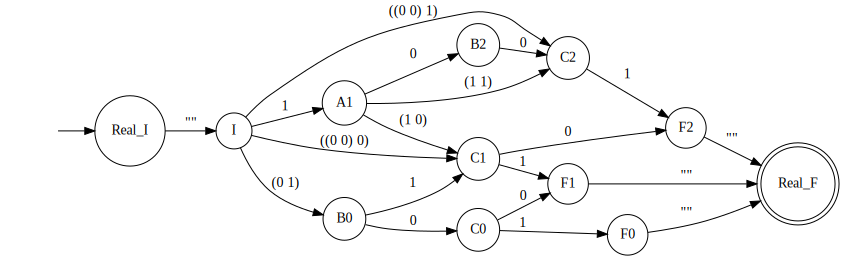

In [50]:
dotObj_List[2]

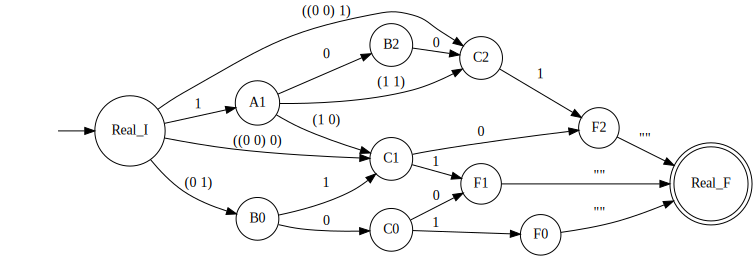

In [51]:
dotObj_List[3]

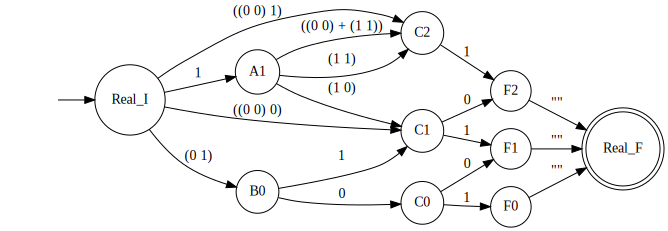

In [52]:
dotObj_List[4]

In [53]:
len(dotObj_List)

13

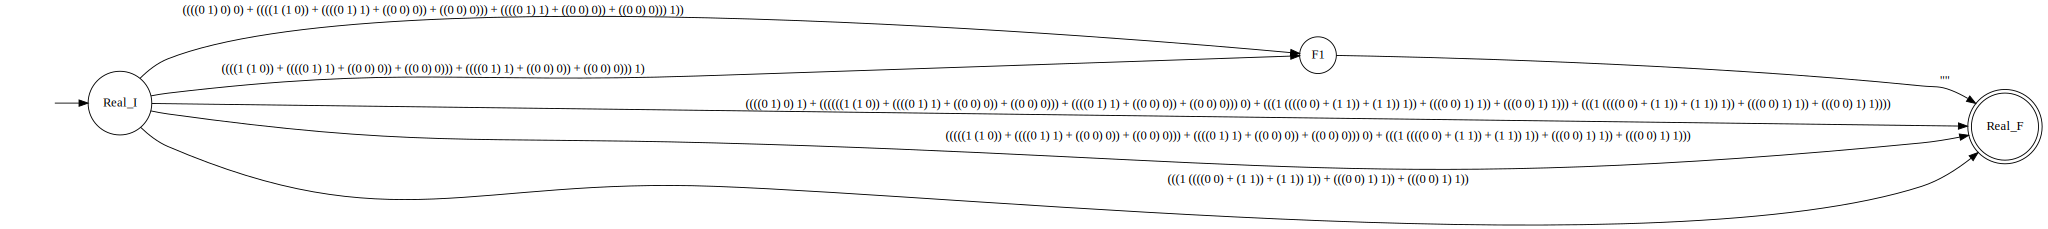

In [54]:
dotObj_List[11]

In [55]:
final_re_str

'(((((((0 1) 0) 0) + ((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 1)) + ((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 1)) + (((((0 1) 0) 1) + ((((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 0) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1))) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1)))) + ((((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 0) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1))) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1))))) + (((((0 1) 0) 1) + ((((((1 (1 0)) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) + ((((0 1) 1) + ((0 0) 0)) + ((0 0) 0))) 0) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1))) + (((1 ((((0 0) + (1 1)) + (1 1)) 1)) + (((0 0) 1) 1)) + (((0 0) 1) 1

# Let us go full circle!

The obtained final RE string is fed back into the conversion pipeline


In [56]:
fullcircle=min_dfa(nfa2dfa(re2nfa(final_re_str)))

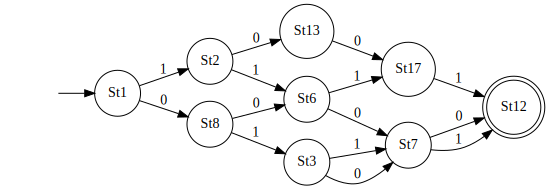

In [57]:
dotObj_dfa(fullcircle)

In [58]:
# This is the two-bit hamming distance machine wrt the intended pattern 0101

h2_from_re = min_dfa(nfa2dfa(re2nfa("(0+1)(0+1)01 + (0+1)1(0+1)1 + (0+1)10(0+1) + 0(0+1)(0+1)1 + 0(0+1)0(0+1) + 01(0+1)(0+1)")))

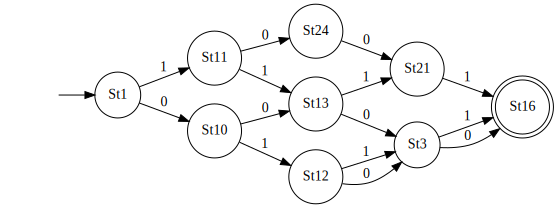

In [59]:
dotObj_dfa(h2_from_re)

In [60]:
iso_dfa(fullcircle,h2_from_re)

True

In [65]:
aplusb_aplusb = dotObj_nfa(re2nfa("(a+b)(a+b)"), True)

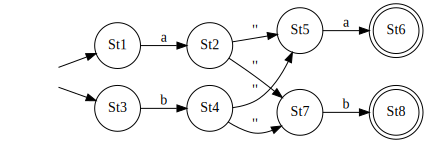

In [66]:
aplusb_aplusb

In [67]:
DOodd1s_or_30s = dotObj_nfa(re2nfa("0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "), True)

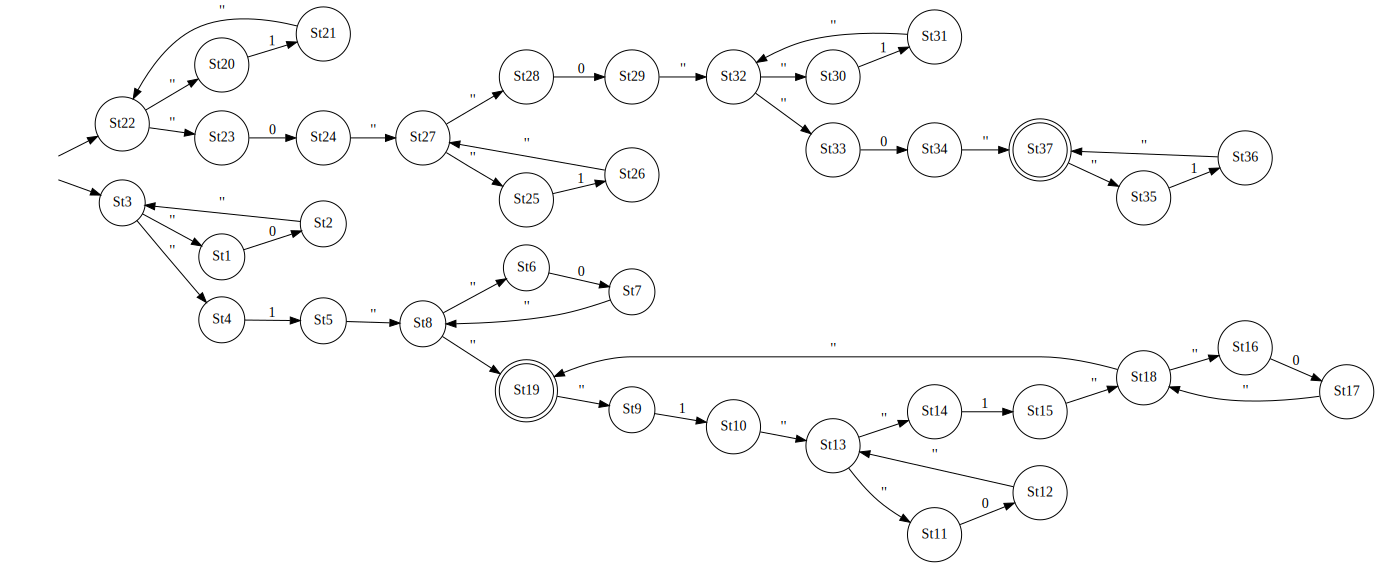

In [68]:
DOodd1s_or_30s

In [69]:
DOodd1s_or_30s = dotObj_nfa(re2nfa("0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "), False)

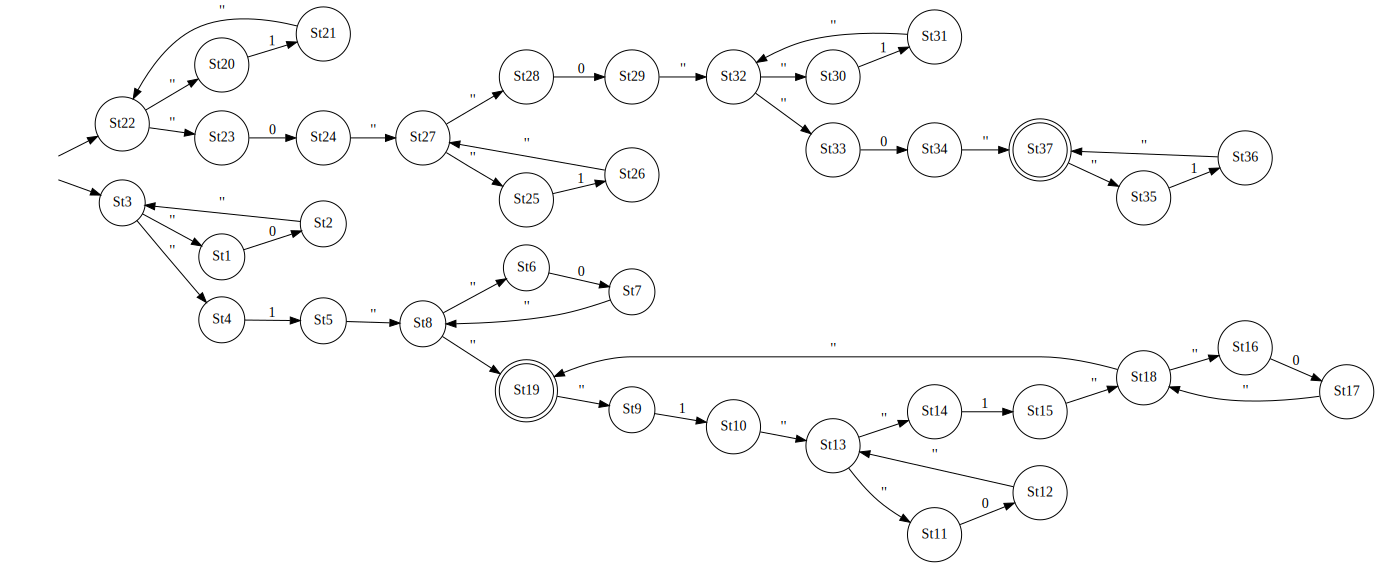

In [70]:
DOodd1s_or_30s

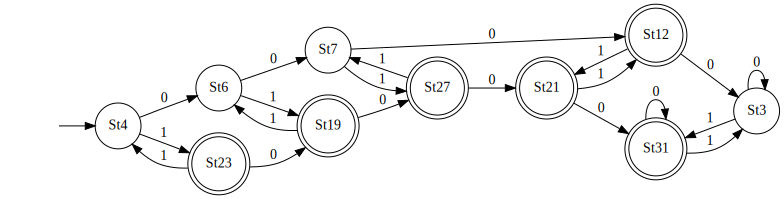

In [71]:
DOodd1s_or_30s_mind = dotObj_dfa(min_dfa(nfa2dfa(re2nfa("0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "))))
DOodd1s_or_30s_mind

Generating LALR tables


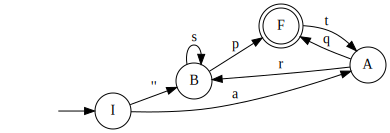

In [83]:
nfaEx = md2mc('''NFA
I : '' -> B
I : a  -> A
!!A : b  -> I
A : q  -> F
A : r  -> B
B : s  -> B
B : p  -> F
F : t  -> A
''')
DO_nfaEx = dotObj_nfa(nfaEx)
DO_nfaEx

In [84]:
GNFA_nfaEx = mk_gnfa(nfaEx)

In [85]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [86]:
(Gfinal, do_list, final_re) = del_gnfa_states(GNFA_nfaEx)

**** Eliminating state I ****
**** Eliminating state F ****
**** Eliminating state A ****
**** Eliminating state B ****


In [87]:
final_re

'((((((a (((q t))* r)) + "") + "") ((((((p t) (((q t))* r)) + s) + s))* ((((p t) (((q t))* q)) + p) + p))) + (a (((q t))* q))) + (a (((q t))* q)))'

In [88]:
final_re

'((((((a (((q t))* r)) + "") + "") ((((((p t) (((q t))* r)) + s) + s))* ((((p t) (((q t))* q)) + p) + p))) + (a (((q t))* q))) + (a (((q t))* q)))'

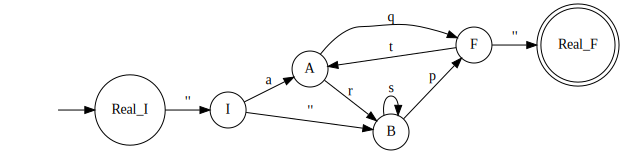

In [89]:
do_list[0]

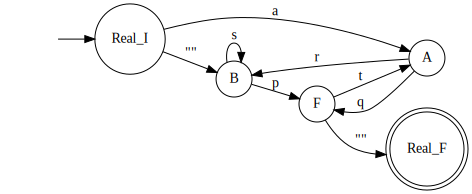

In [90]:
do_list[1]

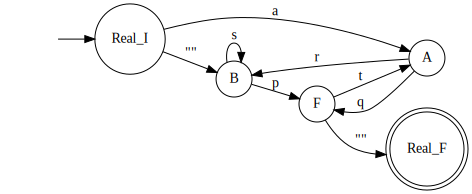

In [91]:
do_list[1]

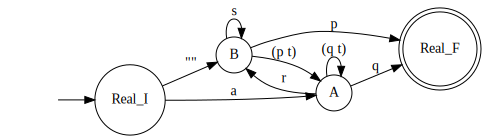

In [92]:
do_list[2]

In [93]:
do_list[2].source

'// GO_St89\ndigraph {\n\tgraph [rankdir=LR]\n\tEMPTY [label="" shape=plaintext]\n\tReal_I [label=Real_I peripheries=1 shape=circle]\n\tB [label=B peripheries=1 shape=circle]\n\tA [label=A peripheries=1 shape=circle]\n\tReal_F [label=Real_F peripheries=2 shape=circle]\n\tEMPTY -> Real_I\n\tA -> Real_F [label="q "]\n\tA -> A [label="(q t) "]\n\tB -> Real_F [label="p "]\n\tB -> A [label="(p t) "]\n\tReal_I -> A [label="a "]\n\tReal_I -> B [label="\\"\\" "]\n\tA -> B [label="r "]\n\tB -> B [label="s "]\n}'

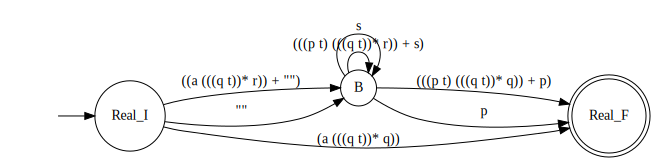

In [94]:
do_list[3]

In [95]:
do_list[3].source

'// GO_St90\ndigraph {\n\tgraph [rankdir=LR]\n\tEMPTY [label="" shape=plaintext]\n\tReal_I [label=Real_I peripheries=1 shape=circle]\n\tB [label=B peripheries=1 shape=circle]\n\tReal_F [label=Real_F peripheries=2 shape=circle]\n\tEMPTY -> Real_I\n\tReal_I -> Real_F [label="(a (((q t))* q)) "]\n\tReal_I -> B [label="((a (((q t))* r)) + \\"\\") "]\n\tB -> Real_F [label="(((p t) (((q t))* q)) + p) "]\n\tB -> B [label="(((p t) (((q t))* r)) + s) "]\n\tB -> Real_F [label="p "]\n\tReal_I -> B [label="\\"\\" "]\n\tB -> B [label="s "]\n}'

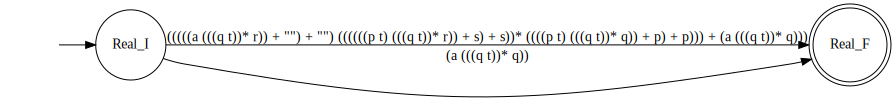

In [96]:
do_list[4]

In [97]:
do_list[4].source

'// GO_St91\ndigraph {\n\tgraph [rankdir=LR]\n\tEMPTY [label="" shape=plaintext]\n\tReal_I [label=Real_I peripheries=1 shape=circle]\n\tReal_F [label=Real_F peripheries=2 shape=circle]\n\tEMPTY -> Real_I\n\tReal_I -> Real_F [label="(((((a (((q t))* r)) + \\"\\") + \\"\\") ((((((p t) (((q t))* r)) + s) + s))* ((((p t) (((q t))* q)) + p) + p))) + (a (((q t))* q))) "]\n\tReal_I -> Real_F [label="(a (((q t))* q)) "]\n}'

In [98]:
re_mindfa = min_dfa(nfa2dfa(re2nfa(final_re)))

In [99]:
dir_mindfa = min_dfa(nfa2dfa(nfaEx))

In [100]:
iso_dfa(re_mindfa,dir_mindfa)

True

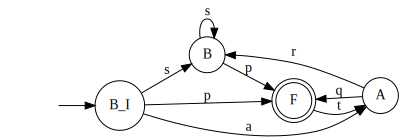

In [101]:
dotObj_dfa(dir_mindfa)

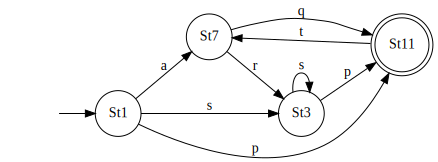

In [102]:
dotObj_dfa(re_mindfa)

In [103]:
dot_san_str('""')

'""'

Generating LALR tables


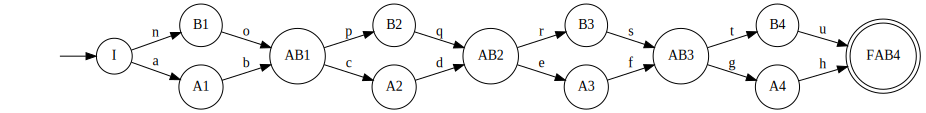

In [104]:
nfaExp = md2mc('''NFA
I : a -> A1
I : n -> B1
A1 : b -> AB1
B1 : o -> AB1
AB1 : c -> A2
AB1 : p -> B2
A2 : d -> AB2
B2 : q -> AB2
AB2 : e -> A3
AB2 : r -> B3
A3 : f -> AB3
B3 : s -> AB3
AB3 : g -> A4
AB3 : t -> B4
A4 : h -> FAB4
B4 : u -> FAB4
''')
DO_nfaExp = dotObj_nfa(nfaExp)
DO_nfaExp

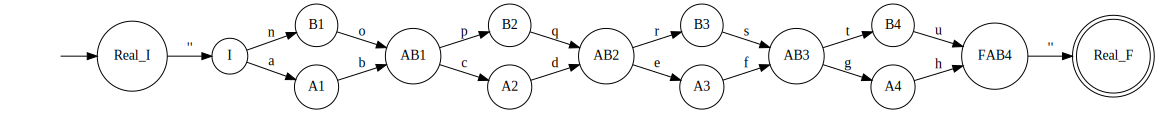

In [105]:
gnfaExp = mk_gnfa(nfaExp)
DO_gnfaExp = dotObj_gnfa(gnfaExp)
DO_gnfaExp

In [106]:
(Gfinal, dotObj_List, final_re_str) = del_gnfa_states(gnfaExp)

**** Eliminating state AB3 ****
**** Eliminating state B1 ****
**** Eliminating state FAB4 ****
**** Eliminating state I ****
**** Eliminating state B3 ****
**** Eliminating state AB1 ****
**** Eliminating state B2 ****
**** Eliminating state A1 ****
**** Eliminating state A2 ****
**** Eliminating state AB2 ****
**** Eliminating state B4 ****
**** Eliminating state A3 ****
**** Eliminating state A4 ****


In [107]:
final_re_str

'(((((((((((((a (b c)) + ((n o) c)) + ((n o) c)) d) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) e) (f g)) + (((((((a (b c)) + ((n o) c)) + ((n o) c)) d) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) (r (s g)))) + (((((((a (b c)) + ((n o) c)) + ((n o) c)) d) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) (r (s g)))) h) + ((((((((((a (b c)) + ((n o) c)) + ((n o) c)) d) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) e) ((f t) u)) + ((((((((a (b c)) + ((n o) c)) + ((n o) c)) d) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) (r (s t))) u)) + ((((((((a (b c)) + ((n o) c)) + ((n o) c)) d) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) + (((a ((b p) q)) + (((n o) p) q)) + (((n o) p) q))) (r (s 

In [108]:
nfaExer = md2mc('''NFA
I1 : a -> X
I2 : b -> X
I3 : c -> X
X  : p | q -> X
X  : m -> F1
X  : n -> F2
''')
DO_nfaExer = dotObj_nfa(nfaExer)
DO_nfaExer
gnfaExer = mk_gnfa(nfaExer)
DO_gnfaExer = dotObj_gnfa(gnfaExer)
DO_gnfaExer
(G, DO, RE) = del_gnfa_states(gnfaExer)

**** Eliminating state X ****
**** Eliminating state I1 ****
**** Eliminating state I2 ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****


Generating LALR tables


In [109]:
RE

'(((((c (((p + q))* m)) + (c (((p + q))* n))) + (c (((p + q))* n))) + (((((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m))) + (((b (((p + q))* n)) + (a (((p + q))* n))) + (a (((p + q))* n)))) + (((b (((p + q))* n)) + (a (((p + q))* n))) + (a (((p + q))* n))))) + (((((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m))) + (((b (((p + q))* n)) + (a (((p + q))* n))) + (a (((p + q))* n)))) + (((b (((p + q))* n)) + (a (((p + q))* n))) + (a (((p + q))* n)))))'

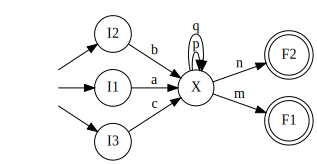

In [110]:
DO_nfaExer

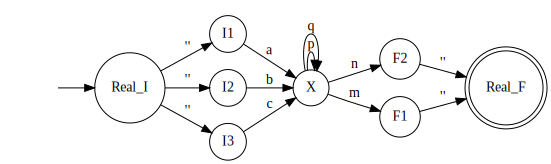

In [111]:
DO[0]

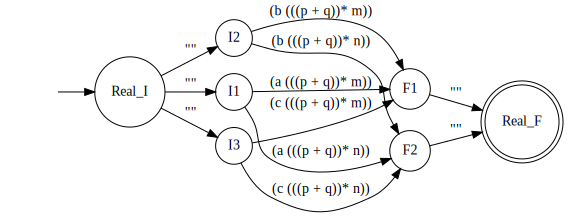

In [112]:
DO[1]

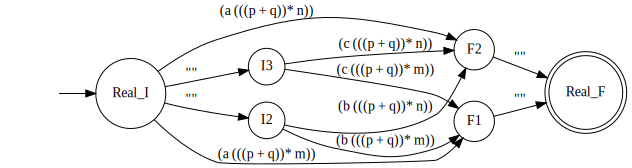

In [113]:
DO[2]

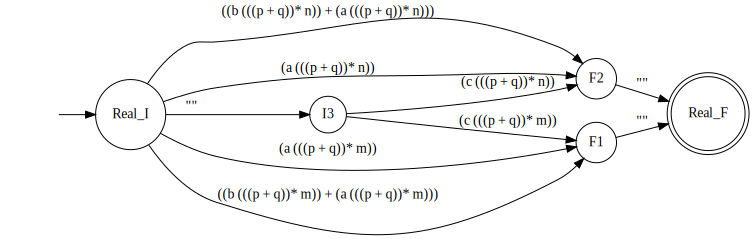

In [114]:
DO[3]

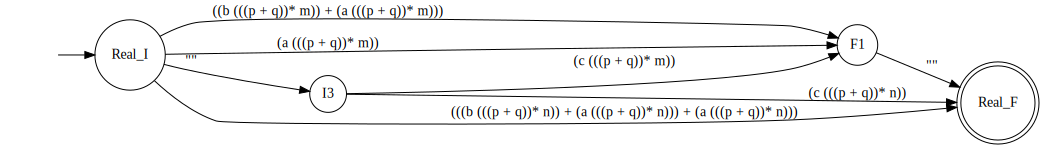

In [115]:
DO[4]

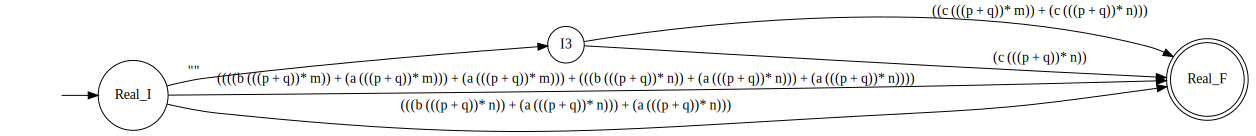

In [116]:
DO[5]

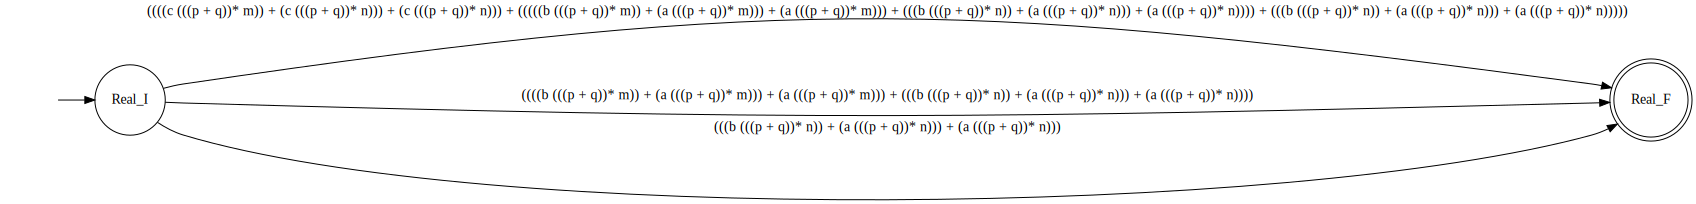

In [117]:
DO[6]

In [118]:
nfaExer = md2mc('''NFA
I1 : a -> X
I2 : b -> X
I3 : c -> X
X  : p | q -> X
X  : m -> F1
X  : n -> F2
''')
DO_nfaExer = dotObj_nfa(nfaExer)
DO_nfaExer
gnfaExer = mk_gnfa(nfaExer)
DO_gnfaExer = dotObj_gnfa(gnfaExer)
DO_gnfaExer
(G, DO, RE) = del_gnfa_states(gnfaExer, DelList=["X", "I1", "I2","I3","F1","F2"])

**** Eliminating state X ****
**** Eliminating state I1 ****
**** Eliminating state I2 ****
**** Eliminating state I3 ****
**** Eliminating state F1 ****
**** Eliminating state F2 ****


Generating LALR tables


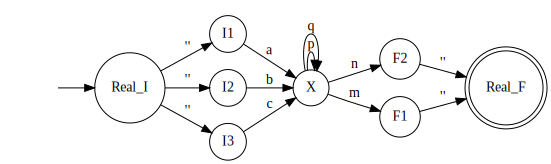

In [119]:
DO_gnfaExer

In [120]:
len(DO)

7

In [121]:
RE

'(((((c (((p + q))* n)) + (((b (((p + q))* n)) + (a (((p + q))* n))) + (a (((p + q))* n)))) + (((b (((p + q))* n)) + (a (((p + q))* n))) + (a (((p + q))* n)))) + (((c (((p + q))* m)) + (((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m)))) + (((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m))))) + (((c (((p + q))* m)) + (((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m)))) + (((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m)))))'

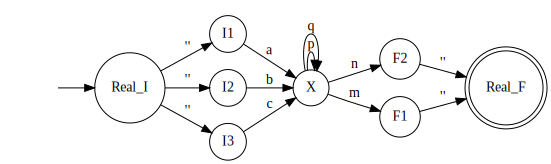

In [122]:
DO[0]

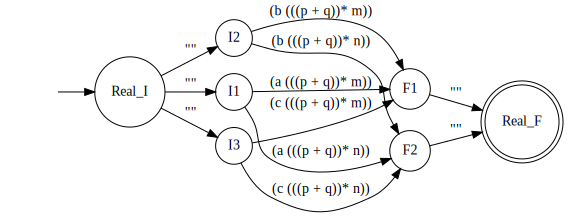

In [123]:
DO[1]

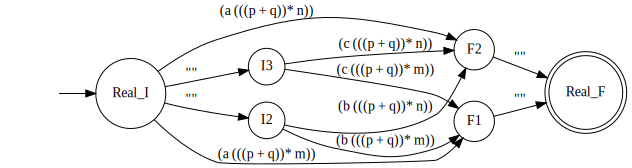

In [124]:
DO[2]

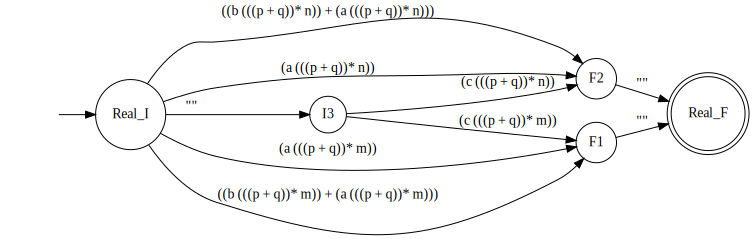

In [125]:
DO[3]

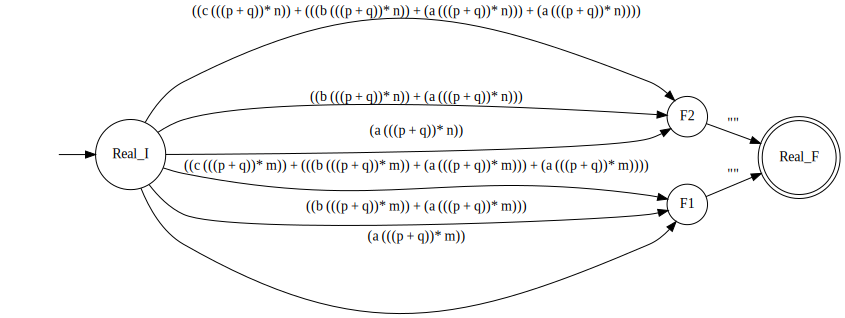

In [126]:
DO[4]

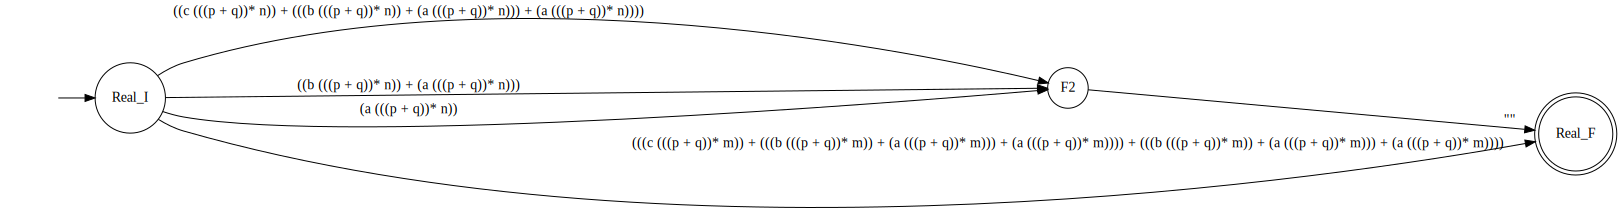

In [127]:
DO[5]

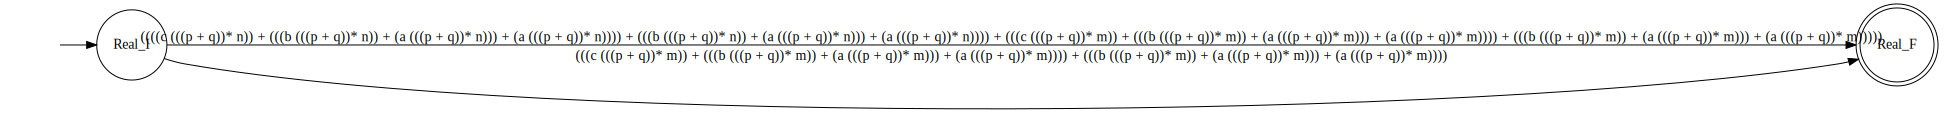

In [128]:
DO[6]

In [129]:
RE

'(((((c (((p + q))* n)) + (((b (((p + q))* n)) + (a (((p + q))* n))) + (a (((p + q))* n)))) + (((b (((p + q))* n)) + (a (((p + q))* n))) + (a (((p + q))* n)))) + (((c (((p + q))* m)) + (((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m)))) + (((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m))))) + (((c (((p + q))* m)) + (((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m)))) + (((b (((p + q))* m)) + (a (((p + q))* m))) + (a (((p + q))* m)))))'

In [130]:
sylv_11_13 = min_dfa(nfa2dfa(re2nfa("(11111111111+1111111111111)*")))

In [131]:
dotObj_dfa(sylv_11_13)

In [132]:
sylv_11_13

{'Q': {'St100',
  'St101',
  'St102',
  'St103',
  'St104',
  'St105',
  'St106',
  'St107',
  'St108',
  'St109',
  'St11',
  'St110',
  'St111',
  'St112',
  'St113',
  'St114',
  'St115',
  'St116',
  'St117',
  'St118',
  'St119',
  'St12',
  'St120',
  'St121',
  'St122',
  'St123',
  'St124',
  'St125',
  'St126',
  'St127',
  'St128',
  'St129',
  'St13',
  'St130',
  'St131',
  'St132',
  'St133',
  'St15',
  'St17',
  'St18',
  'St19',
  'St20',
  'St21',
  'St22',
  'St23',
  'St25',
  'St26',
  'St27',
  'St28',
  'St29',
  'St30',
  'St31',
  'St32',
  'St33',
  'St34',
  'St35',
  'St36',
  'St37',
  'St38',
  'St39',
  'St40',
  'St41',
  'St43',
  'St44',
  'St45',
  'St46',
  'St47',
  'St48',
  'St49',
  'St50',
  'St51',
  'St52',
  'St53',
  'St54',
  'St55',
  'St56',
  'St57',
  'St58',
  'St59',
  'St6',
  'St60',
  'St61',
  'St62',
  'St63',
  'St64',
  'St65',
  'St66',
  'St67',
  'St68',
  'St69',
  'St70',
  'St71',
  'St72',
  'St73',
  'St74',
  'St75',
  

In [133]:
sylv_3_5 = min_dfa(nfa2dfa(re2nfa("(111+11111)*")))

In [134]:
len(sylv_3_5["Q"]) - 2

7

In [135]:
3*5-3-5

7

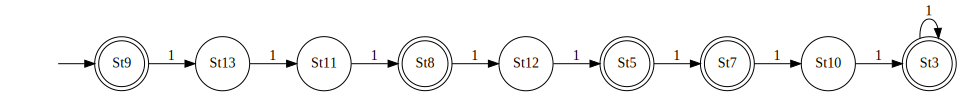

In [136]:
dotObj_dfa(sylv_3_5)

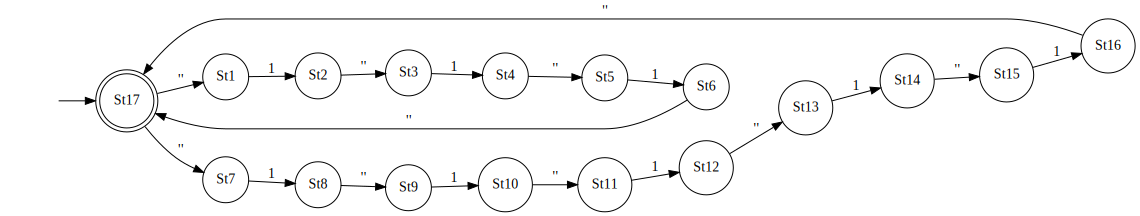

In [137]:
dotObj_nfa(re2nfa("(111+11111)*"))

In [138]:
nfa_3_5 = re2nfa("(111+11111)*")

In [139]:
nfa_3_5

{'Q': {'St1',
  'St10',
  'St11',
  'St12',
  'St13',
  'St14',
  'St15',
  'St16',
  'St17',
  'St2',
  'St3',
  'St4',
  'St5',
  'St6',
  'St7',
  'St8',
  'St9'},
 'Sigma': {'1'},
 'Delta': {('St17', ''): {'St1', 'St7'},
  ('St1', '1'): {'St2'},
  ('St3', '1'): {'St4'},
  ('St2', ''): {'St3'},
  ('St5', '1'): {'St6'},
  ('St4', ''): {'St5'},
  ('St7', '1'): {'St8'},
  ('St9', '1'): {'St10'},
  ('St8', ''): {'St9'},
  ('St11', '1'): {'St12'},
  ('St10', ''): {'St11'},
  ('St13', '1'): {'St14'},
  ('St12', ''): {'St13'},
  ('St15', '1'): {'St16'},
  ('St14', ''): {'St15'},
  ('St6', ''): {'St17'},
  ('St16', ''): {'St17'}},
 'Q0': {'St17'},
 'F': {'St17'}}

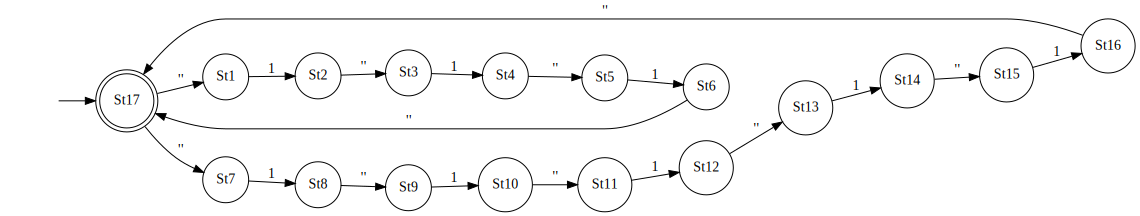

In [140]:
dotObj_nfa(nfa_3_5)

In [141]:
Gnfa_3_5 = mk_gnfa(nfa_3_5)

In [142]:
Gnfa_3_5

{'Q': {'Real_F',
  'Real_I',
  'St1',
  'St10',
  'St11',
  'St12',
  'St13',
  'St14',
  'St15',
  'St16',
  'St17',
  'St2',
  'St3',
  'St4',
  'St5',
  'St6',
  'St7',
  'St8',
  'St9'},
 'Sigma': {'1'},
 'Delta': {('St17', ''): {'Real_F', 'St1', 'St7'},
  ('St1', '1'): {'St2'},
  ('St3', '1'): {'St4'},
  ('St2', ''): {'St3'},
  ('St5', '1'): {'St6'},
  ('St4', ''): {'St5'},
  ('St7', '1'): {'St8'},
  ('St9', '1'): {'St10'},
  ('St8', ''): {'St9'},
  ('St11', '1'): {'St12'},
  ('St10', ''): {'St11'},
  ('St13', '1'): {'St14'},
  ('St12', ''): {'St13'},
  ('St15', '1'): {'St16'},
  ('St14', ''): {'St15'},
  ('St6', ''): {'St17'},
  ('St16', ''): {'St17'},
  ('Real_I', ''): {'St17'}},
 'Q0': {'Real_I'},
 'F': {'Real_F'}}

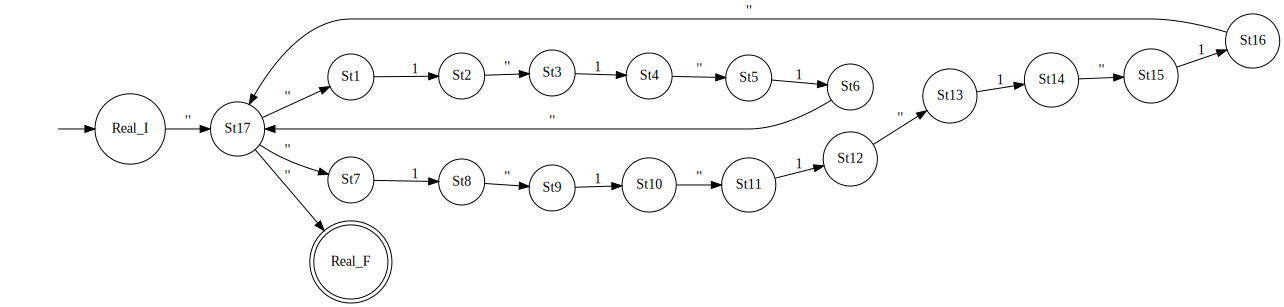

In [143]:
dotObj_gnfa(Gnfa_3_5)

In [144]:
(Gfinal, dotObj_List, final_re_str) = del_gnfa_states(Gnfa_3_5)

**** Eliminating state St5 ****
**** Eliminating state St12 ****
**** Eliminating state St2 ****
**** Eliminating state St8 ****
**** Eliminating state St7 ****
**** Eliminating state St9 ****
**** Eliminating state St10 ****
**** Eliminating state St15 ****
**** Eliminating state St6 ****
**** Eliminating state St13 ****
**** Eliminating state St14 ****
**** Eliminating state St3 ****
**** Eliminating state St11 ****
**** Eliminating state St16 ****
**** Eliminating state St17 ****
**** Eliminating state St1 ****
**** Eliminating state St4 ****


In [145]:
len(dotObj_List)

18

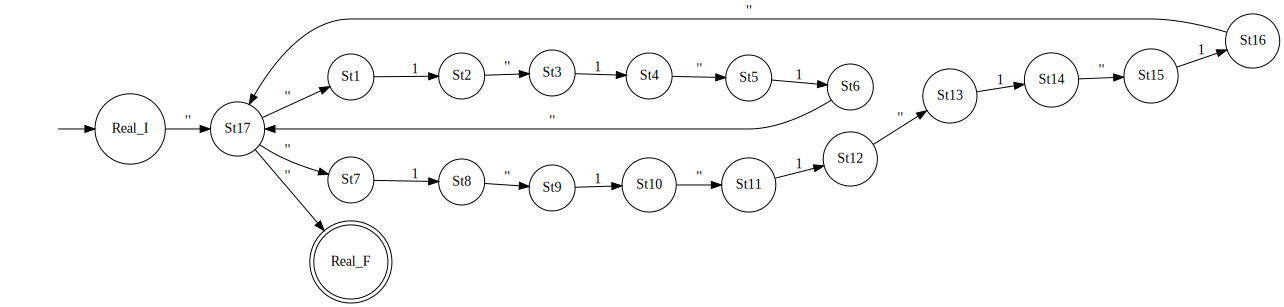

In [146]:
dotObj_List[0]

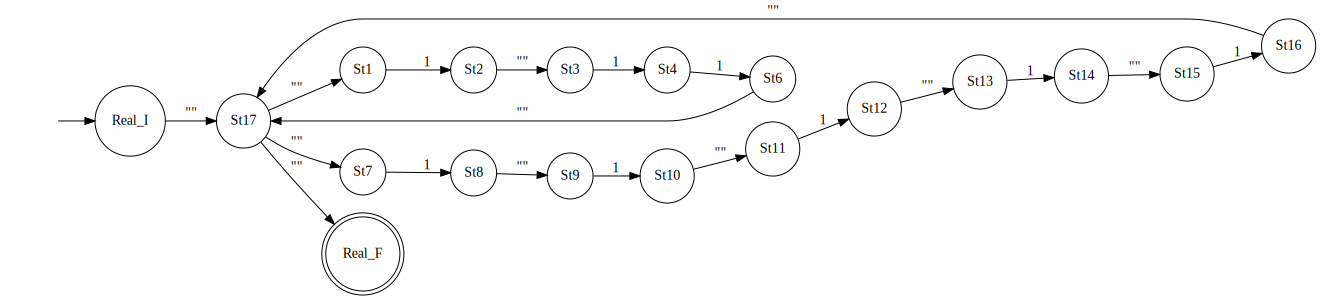

In [147]:
dotObj_List[1]

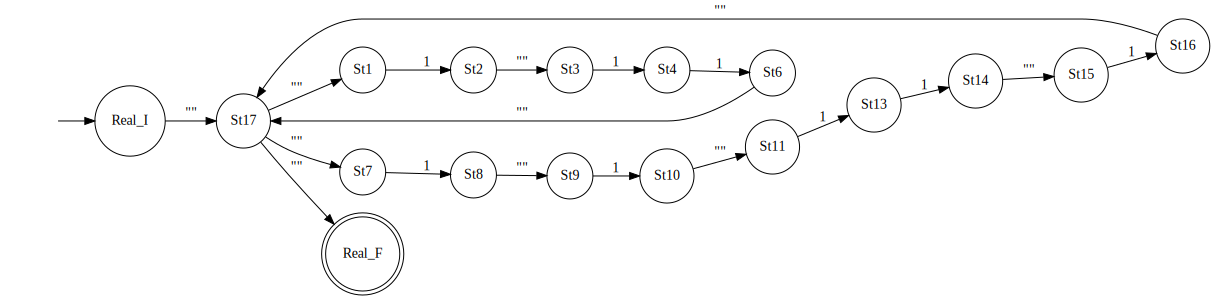

In [148]:
dotObj_List[2]

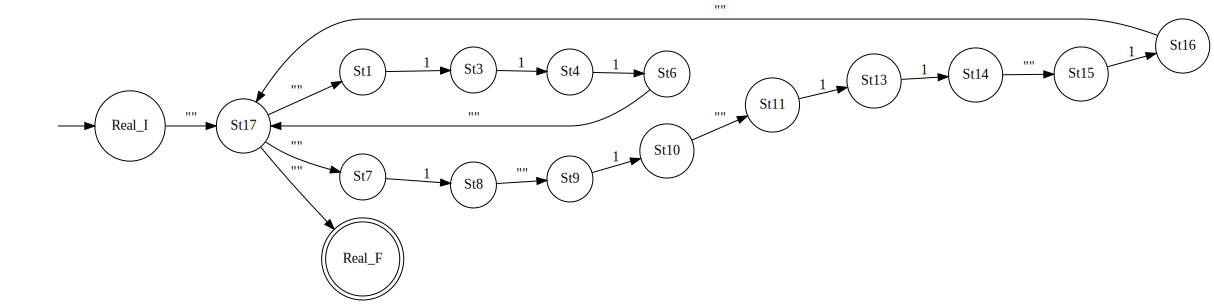

In [149]:
dotObj_List[3]

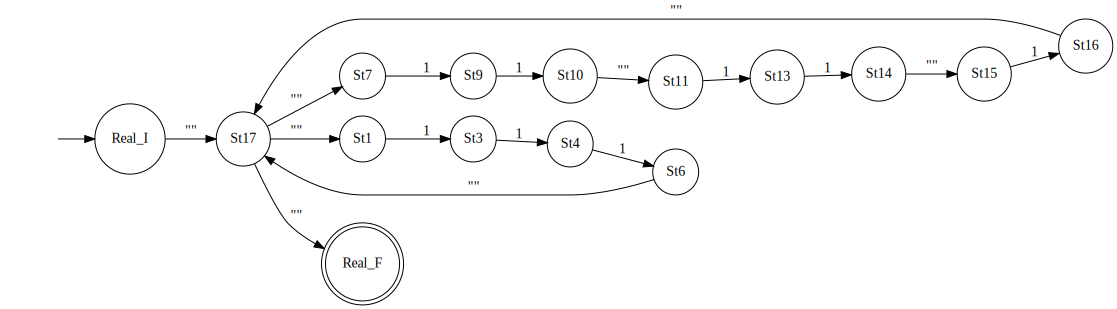

In [150]:
dotObj_List[4]

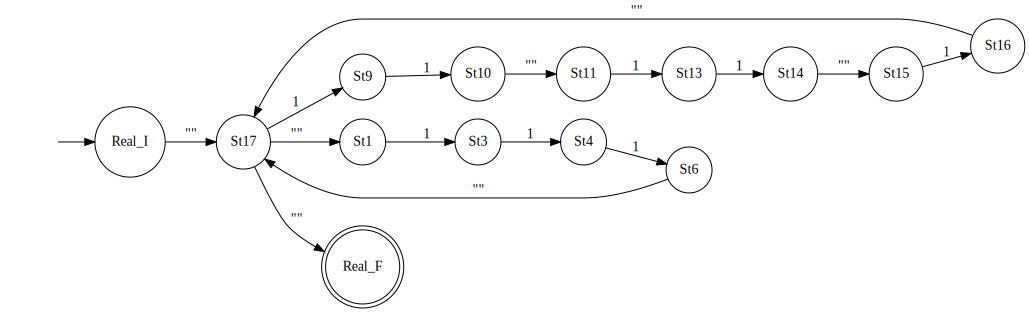

In [151]:
dotObj_List[5]

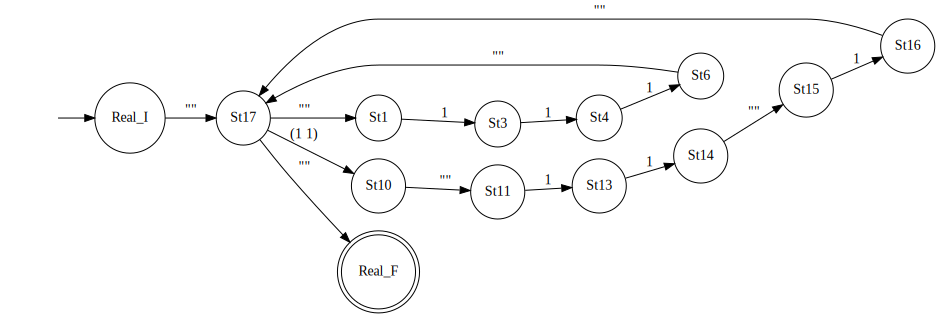

In [152]:
dotObj_List[6]

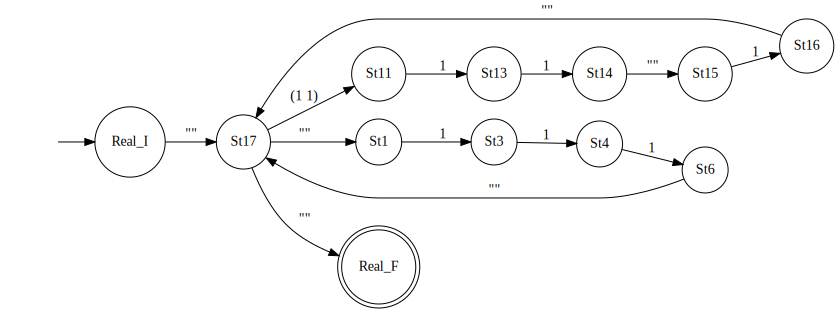

In [153]:
dotObj_List[7]

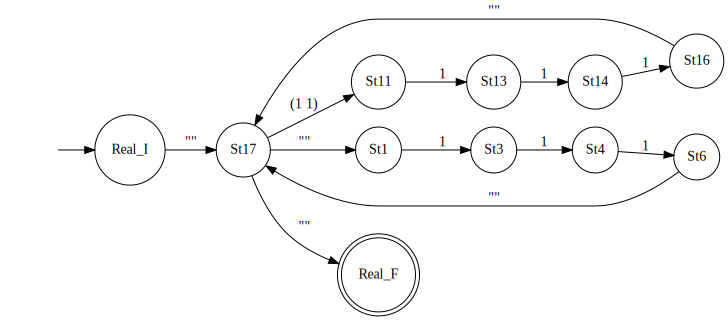

In [154]:
dotObj_List[8]

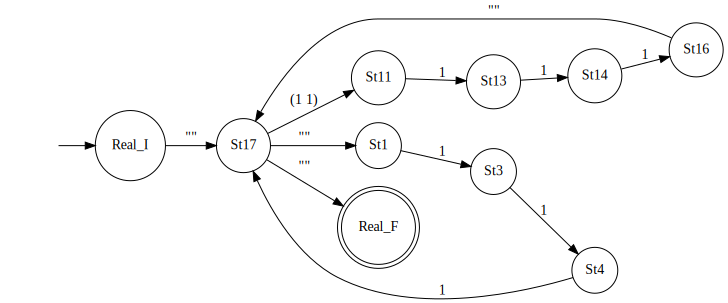

In [155]:
dotObj_List[9]

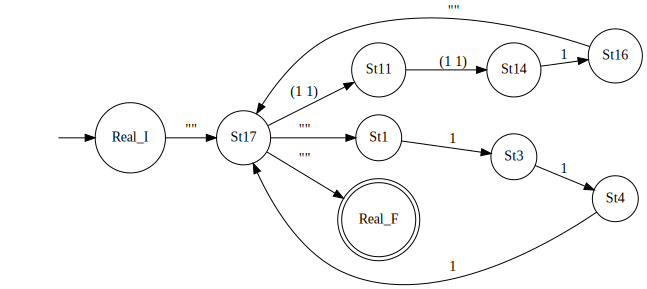

In [156]:
dotObj_List[10]

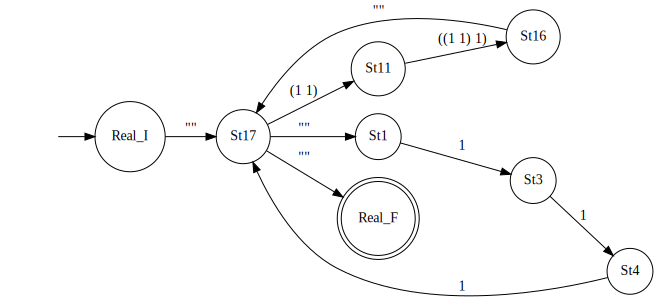

In [157]:
dotObj_List[11]

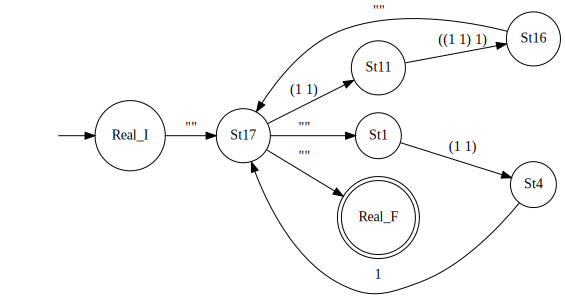

In [158]:
dotObj_List[12]

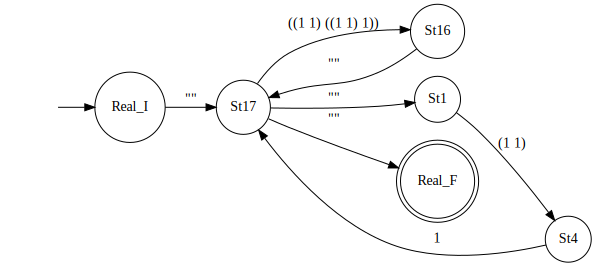

In [159]:
dotObj_List[13]

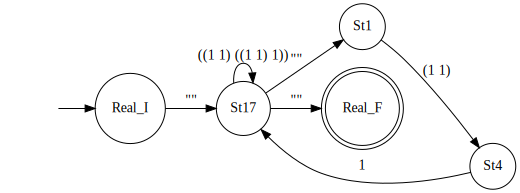

In [160]:
dotObj_List[14]

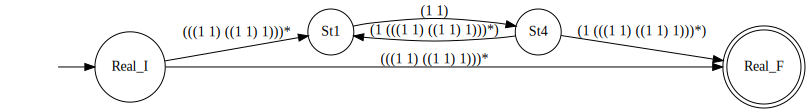

In [161]:
dotObj_List[15]

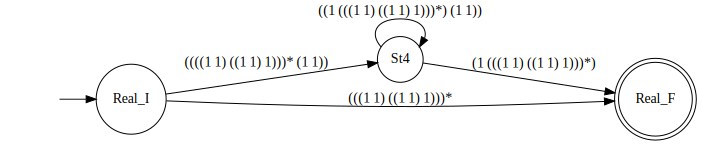

In [162]:
dotObj_List[16]

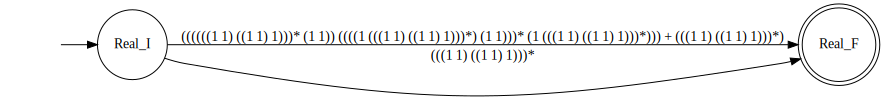

In [163]:
dotObj_List[17]

In [164]:
len(dotObj_List)

18

In [165]:
final_re_str

'(((((((1 1) ((1 1) 1)))* (1 1)) ((((1 (((1 1) ((1 1) 1)))*) (1 1)))* (1 (((1 1) ((1 1) 1)))*))) + (((1 1) ((1 1) 1)))*) + (((1 1) ((1 1) 1)))*)'

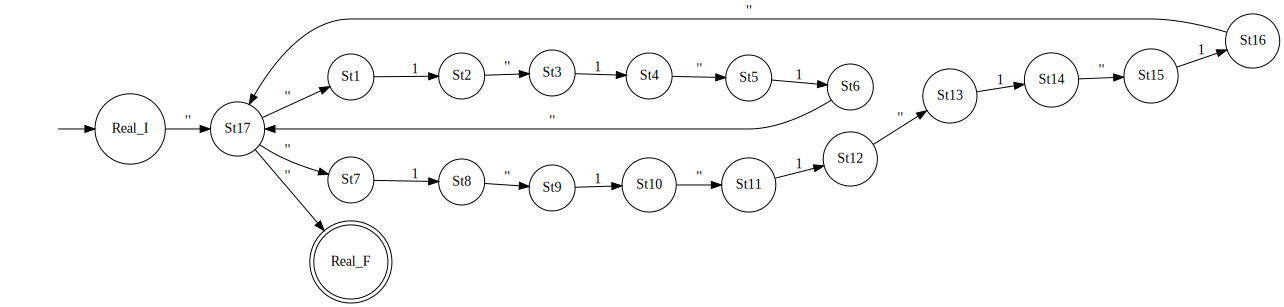

In [166]:
dotObj_gnfa(mk_gnfa(re2nfa("(111+11111)*")))

In [167]:
minD_renfare = min_dfa(nfa2dfa(re2nfa(final_re_str)))

In [168]:
DOminD_renfare = dotObj_dfa(minD_renfare)

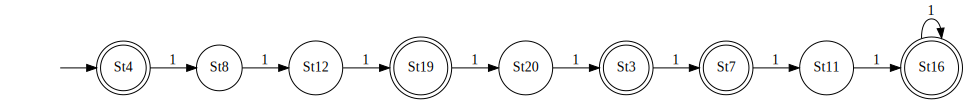

In [169]:
DOminD_renfare

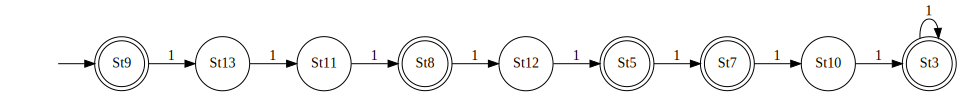

In [170]:
dotObj_dfa(min_dfa(nfa2dfa(nfa_3_5)))

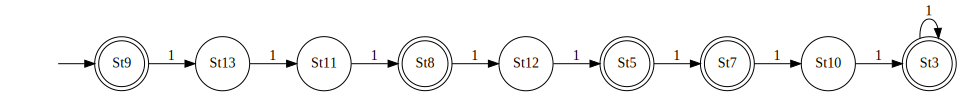

In [171]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+11111)*"))))

In [172]:
sylv_3_5 = min_dfa(nfa2dfa(re2nfa("(111+11111)*")))

In [173]:
len(sylv_3_5["Q"]) - 1 - 1

7

In [174]:
DO_sylv_3_5 = dotObj_dfa(sylv_3_5)

In [175]:
non_sylv_3_6 = min_dfa(nfa2dfa(re2nfa("(111+111111)*")))

In [176]:
DO_non_sylv_3_6 = dotObj_dfa(non_sylv_3_6)

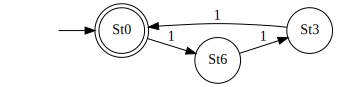

In [177]:
DO_non_sylv_3_6

In [178]:
non_sylv_prefix_and_3_6 = min_dfa(nfa2dfa(re2nfa("111(111+111111)*")))

In [179]:
DO_non = dotObj_dfa(non_sylv_prefix_and_3_6)

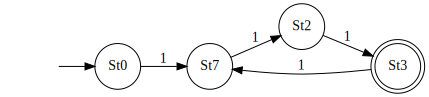

In [180]:
DO_non

In [181]:
stamp_3_5_7 = min_dfa(nfa2dfa(re2nfa("(111+11111+1111111)*")))

In [182]:
DOstamp_3_5_7 = dotObj_dfa(stamp_3_5_7)

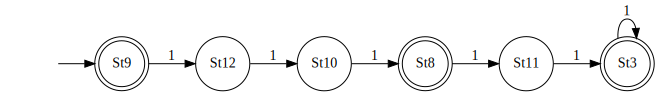

In [183]:
DOstamp_3_5_7

In [184]:
len(min_dfa(nfa2dfa(re2nfa("(111+1111111111111)*")))["Q"]) - 2

23

Generating LALR tables


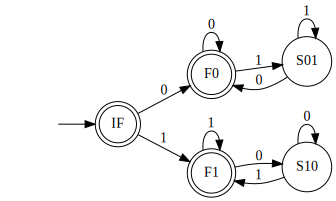

In [185]:
dfaBESame = md2mc('''
DFA !! Begins and ends with same; epsilon allowed
IF  : 0 -> F0
IF  : 1 -> F1
!!
F0  : 0 -> F0
F0  : 1 -> S01
S01 : 1 -> S01
S01 : 0 -> F0
!!
F1  : 1 -> F1
F1  : 0 -> S10
S10 : 0 -> S10
S10 : 1 -> F1
''')
DOdfaBESame = dotObj_dfa(dfaBESame)
DOdfaBESame

In [186]:
nfaBESame = apply_h_dfa(dfaBESame, lambda x: '0')

In [187]:
nfaBESame

{'Q': {'F0', 'F1', 'IF', 'S01', 'S10'},
 'Sigma': {'0'},
 'Delta': {('IF', '0'): {'F0', 'F1'},
  ('F0', '0'): {'F0', 'S01'},
  ('S01', '0'): {'F0', 'S01'},
  ('F1', '0'): {'F1', 'S10'},
  ('S10', '0'): {'F1', 'S10'}},
 'Q0': {'IF'},
 'F': {'F0', 'F1', 'IF'}}

In [188]:
DONFABESame = dotObj_nfa(nfaBESame)

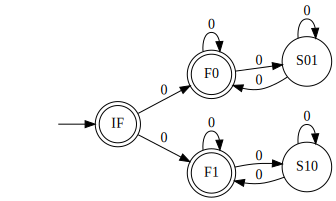

In [189]:
DONFABESame

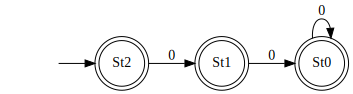

In [190]:
dotObj_dfa(nfa2dfa(nfaBESame))

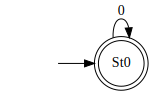

In [191]:
dotObj_dfa(min_dfa(nfa2dfa(nfaBESame)))

In [192]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')

Generating LALR tables


In [193]:
blimpnfa = apply_h_dfa(blimp, lambda x: 'a')

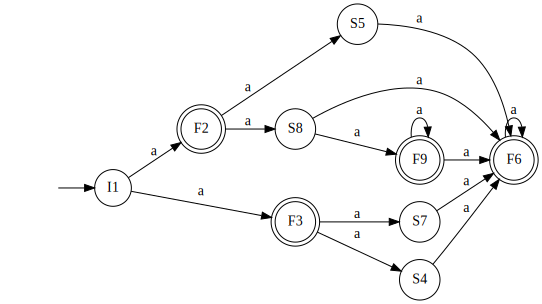

In [194]:
dotObj_nfa(blimpnfa)

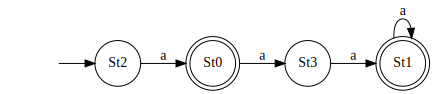

In [195]:
dotObj_dfa(nfa2dfa(blimpnfa))

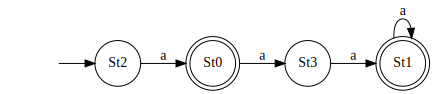

In [196]:
dotObj_dfa(min_dfa(nfa2dfa(blimpnfa)))

In [197]:
testdfa = md2mc('''DFA
I : 0 | 1 -> I
I : 2 -> F
''')

Generating LALR tables


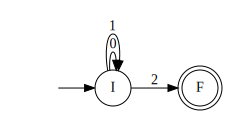

In [198]:
dotObj_dfa_w_bh(testdfa)

In [199]:
help(dotObj_dfa_w_bh)

Help on function dotObj_dfa_w_bh in module jove.DotBashers:

dotObj_dfa_w_bh(D, FuseEdges=False, dfaName='do_', STATENAME_MAXSIZE=20)
    In : D (DFA : partially consistent, states shrunk)
         dfaName (string)
         STATENAME_MAXSIZE : number
    Out: A dot object. 
    Generate a dot object representing the automaton. 
    Do not suppress "black-hole states".



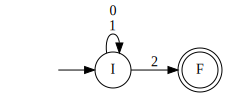

In [200]:
dotObj_dfa(testdfa, FuseEdges=True)

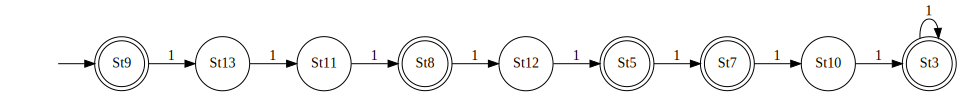

In [201]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+11111)*"))))

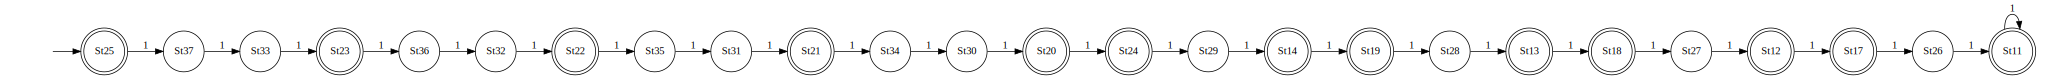

In [202]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+1111111111111)*"))))

In [203]:
ResetStNum()

0

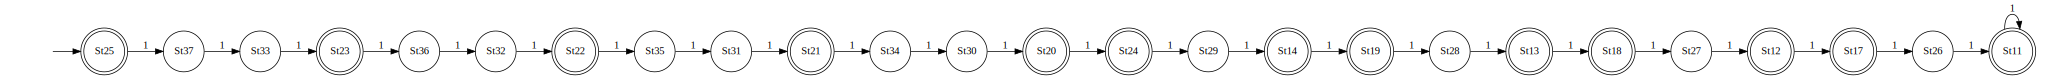

In [204]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+1111111111111)*"))))

In [205]:
ResetStNum()

0

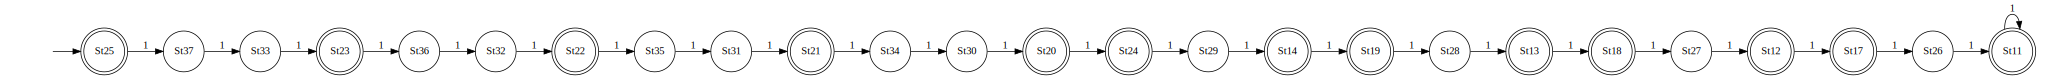

In [206]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+1111111111111)*"))))